In [ ]:
# Welcome to the Movie database project! 


# Project: Statistical Investigation of The Movie Database(TMDB)
## This Database contains about 10,000 movies collected from The Movie Database (TMDb), which includes user ratings, movie budget and revenue, popularity, movies cast, among others.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a>
    <ul>
        <li><a href="#RQ">Research Questions and Hypotheses</a>
        </li>
        <li><a href="#assumptions">Assumptions</a></li>
    </ul>
</li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>The Movie Database is a collection of movies with detailed profiling of the movies from 1960 to 2010. 
The design type of the datatset provided is a survey research design which is typically descriptuve. Therefore the independent variables in this dataset were not manipulated. 

### Research Questions and Null Hypothesis
##### Based on the dataset provided, the following questions and null hypotheses are stated:
#### Research Question 1: Can Popularity predict the Revenue of movies?
#### Research Question 2: Which genres of movies were the most expensive to produce ever?
#### Null Hypothesis 1: There is no significant relationship between vote average and revenue of movies

> These Questions and Hypotheses are investigated using pandas and numpy statictical metrics in correlation, sum, means and standard deviations. 
In research question one, the means of Popularity and Revenues are compared over the years to evaluate the impact while also comparing the year by year mean statistics. The two variables being continuous variables were explored using pandas correlation metrics with popularity being the independent variable and revenue the dependent.
In research question two, the sum, mean and standard deviations of budget was compared against the genres of movies. 
n hypothesis one, vote average was made into a categorical variable of four levels using pandas cut and the statistical metrics were compared for relative differences.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# make visualisations diplay in the notebook
% matplotlib inline


### Data Collection and Description
> The Data is collected using pandas read_csv method to extract the csv file. 
The shape, describe and info methods were also called to get a clearer description of the data collected.
The head method was employed to have a peek into the dataset

### General Properties
> The Dataset has 10866 rows and 21 columns

In [2]:
# read dataset from csv file
df = pd.read_csv('tmdb-movies.csv')


# numbers of rows and colums
df.shape

# quick description of dataset metrics
df.describe()

# quick view of dataset row numbers and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, the dataset was loaded in using pandas read_csv, and checked for cleanliness. Firstly the following columns were dropped as they had minimal relevance for the study:
-homepage, tagline, overview, keywords, id, imdb_id. The inplace= True was used to ensure the trimmed dataset is saved. 
Secondly, a duplicate was observed on the index and this was perused and dropped as it had minimal implication for the analysis. 
Thirdly, null values of 0 were observed in the budget and revenue columns, both of which are vital for the investigation. Pandas replace was employed and the mean values were utilised to fill the null values.


In [3]:
# drop variables with minimal relevance to the investigation
df.drop(['homepage', 'tagline', 'overview', 'keywords', 'id', 'imdb_id'], axis = 1, inplace = True)

# verify dropped data
df.head()
# check total duplicates
sum(df.duplicated())

# drop duplicate values in rows
df.drop_duplicates(inplace = True)

# verify duplicates are dropped
sum(df.duplicated())

# empty values in budget && revenue
sum(df.budget == 0)
sum(df.revenue == 0)

# fill null values in budget and revenue with mean values
df.budget.replace(0, df.budget.mean(), inplace = True)
sum(df.budget == 0)
df.revenue.replace(0, df.revenue.mean(), inplace = True)
sum(df.revenue == 0)


0

<a id='eda'></a>
## Exploratory Data Analysis

> In exploring the dataset we asked some rsearch questions and posed some hypotheses. Statistical metrics we applied on the dataset in order to make meaning of the collection. Visualizations are also created to depict relationship between the variables employed. 

### Research Question 1: Can Popularity predict the Revenue of movies?

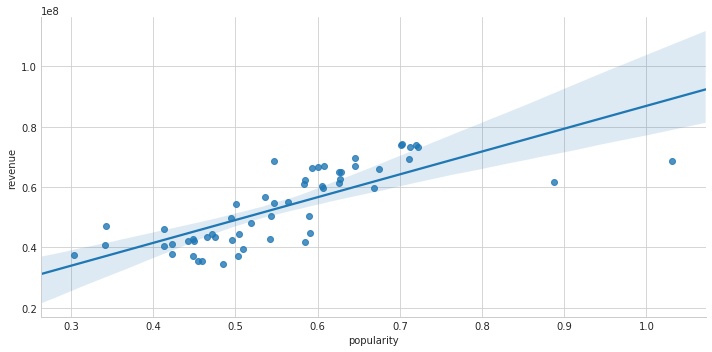

In [4]:
# run a bivariate correlation between popularity and revenue to determine the associative impact over the years 
df[['popularity', 'revenue']].corr()

# run a bivariate correlation between popularity and revenue to get the yearly relationship between both variable
df.groupby('release_year')[['popularity', 'revenue']].corr().iloc[0::2,-1]

# obtain meean values of popularity and revenue by years
mean_vals = df.groupby('release_year')[['popularity', 'revenue']].mean()

# create a scatter plot using seaborn to show the line of best fit
sns.set_style("whitegrid")
graphics = sns.lmplot(x= 'popularity', y = 'revenue', data = mean_vals, aspect = 2);

> 

### Research Question 2: Which genres of movies were the most expensive to produce ever?

In [5]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
# compute the budget for each genre of movies year by year and sort from most expensive to least expensive
budget_by_year = df.groupby(['release_year','genres']).budget.mean().sort_values(ascending=False)
# extract the top 10 most expensive movies to observe the genres
budget_by_year.iloc[:10]

# find the most expensive details by indexing
df.iloc[2243:2244]


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,0.25054,425000000.0,11087569.0,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/10,74,6.4,2010,425000000.0,11087569.0


### Null Hypothesis 1: There is no significant relationship between vote average and revenue of movies

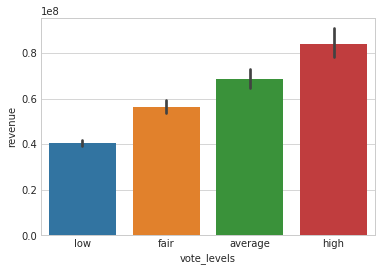

In [6]:
# get a statistical metrics of the vote average to create edges
df['vote_average'].describe()
# create edges based on the statistical metrics
vote_edges = [1.5, 5.4, 6.0, 6.6, 9.2]
# establish categorical variables based off the edges
vote_values = ['low', 'fair', 'average', 'high']
# connect the categorical vairables with the edges
df['vote_levels'] = pd.cut(df['vote_average'], vote_edges, labels = vote_values)

# use numpy aggregations
df.groupby('vote_levels').revenue.agg([np.sum, np.mean, np.std])

gg = df.groupby('vote_levels')

# investigate which movies recieved the highest votes ever, sort with the highest vote up
gg.filter(lambda x: len(x) >= 6.6).sort_values('vote_average', ascending=False).iloc[0: 10]

# create a barchart to visualize the vote_levels and revenue
sns.barplot(x="vote_levels", y="revenue", data=df);


<a id='conclusions'></a>


## Discussions
> 
## Conclusions

> Research Question 1: Can Popularity predict the Revenue of movies?
From the results there is a positive correlation between Populartiy and Revenue of movies. A correlation coefficient of 0.635 was recorded meaning that there is a 64% chance that Revenue was predicted by Popularity. In 1977, he highest record of popularity predicating revenuew was recorded with a correlation coefficient of 0.9104 such that in that year 91% chance that the popularity of a movie meant a good return financially.
1960, 1966 and 1971 recorded negative correlation such that popular movies did not make good revenues. 

> Research Question 2: Which genres of movies were the most expensive to produce ever?
A combination of Adventure, fantasy and Action were the most expensive movies ever to be produced. This is reasonable as reality has to be simulated in an adventure and fantasy setting. It s also important to note that these movies were especially made in the 2000's which co-incided with the internet burst which would have neccesitated employing technology which was at that instance very expensive to utilise and still is. The most expensive movie is title 'The Warrior's Way' which cost 425 million dollars.

> Null Hypothesis 1: There is no significant relationship between vote average and revenue of movies
There is a very high relationship between vote average and revenue of movies. The higher the vote average the higher the revenue made.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [8]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255